In [1]:
from __future__ import division, print_function
%matplotlib inline

# Image as an numpy array
Images are represented as standard numpy arrays. This allows maximum inter operability with other libraries in the scientific Python ecosystem, such as matplotlit, scipy, and scikit-learn.

Let's see how to build a grayscale inmage as a 2D array.

[ 0.55453287  0.13923106  0.13209126  0.4341643   0.08087126  0.43580077
  0.65829526  0.12274506  0.12885336  0.57507663]


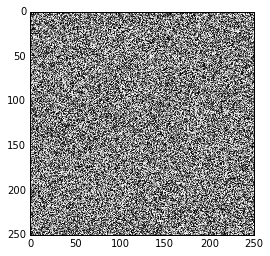

In [3]:
import numpy as np
from matplotlib import pyplot as plt

#Let's see what np.random.random generates.
print(np.random.random(10))  # Uniform distribution in [0, 1]

random_image = np.random.random([250, 250])

plt.imshow(random_image, cmap="gray", interpolation="nearest")

# Change the Default

(1) Change the default colormap:
plt.rcParams["image.cmap"] = "gray"

(2) Change the interpolation
plt.rcParams["image.interpolation"] = "nearest"

In [13]:
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = "nearest"

# Image I/O
The scikit-image operates on NumPy arrays, so any image reader library that provides arrays will do. Typical options are matplotlib, pillow, imageio, imread, etc.

<type 'numpy.ndarray'> uint8 (395L, 576L, 4L)


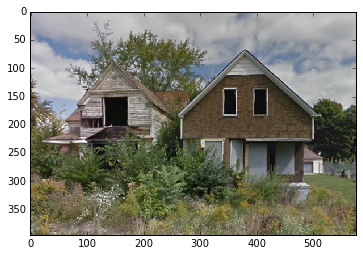

In [5]:
from skimage import io

image = io.imread("./images/Blighted_House.png")

print(type(image), image.dtype, image.shape)
plt.imshow(image, interpolation="nearest")

# Color and Exposure
As discussed earlier, images are just numpy arrays. The numbers in those arrays correspond to the intensity of each pixel (or, in the case of a color image, the intensity of a specific color). scikit-image provides the color and exposure modules.

## Basic image manipulation

Recall that color images are arrays with pixel rows and columns as the first two dimensions, plus a 3rd dimension that describes the RGB color channels and the alpha channel.

## Slicing and indexing

We want to plot just the red channel, the green channel, the red channel, and the alpha channel individually.

red 0 255
green 0 255
blue 0 255
alpha 255 255


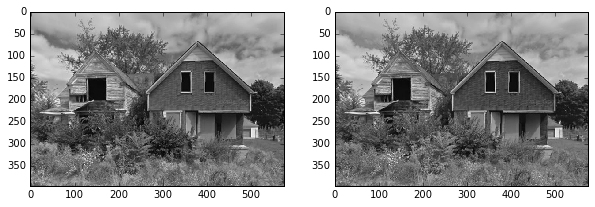

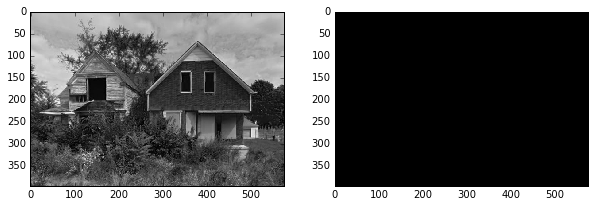

In [15]:
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[..., 2]
alpha_channel = image[:, :, 3]

print("red", red_channel.min(), red_channel.max())
print("green", green_channel.min(), green_channel.max())
print("blue", blue_channel.min(), blue_channel.max())
print("alpha", alpha_channel.min(), alpha_channel.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10))
ax0.imshow(red_channel, cmap="gray", interpolation="nearest")
ax1.imshow(green_channel, cmap="gray", interpolation="nearest")
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(10, 10))
ax2.imshow(blue_channel, cmap="gray", interpolation="nearest")
ax3.imshow(alpha_channel, cmap="gray", interpolation="nearest")

# Data types and Image values

In literature, one finds different conventions for representing image values:
    0 - 255 where 0 is black, 255 is white
    0 - 1   where 0 is black, 1 is white

scikit-image supports both conventions-- the choice is determined by thed data-type of the array.

The library is designed in such a way that any data-type is allowed as input, as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes, 0-65535 for unsigned 16-bit integers)

This is achieved through the use of a few utility functions, such as img_as_float and img_as_ubyte:

In [16]:
from skimage import img_as_float, img_as_ubyte

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())


type, min, max: float64 0.0 1.0
type, min, max: uint8 0 255


recommended using the floating potin representation, given that scikit-image mostly uses that format internally.

# Exercise: Draw a letter H in the image
Define a function that takes an RGBalpha image and a pair of coordinates (row, column), and returns the image (optionally a copy) with green letter H overlaid at those coordinates. The coordinates should point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

In [21]:
def draw_H(image, coords, color=(0.8, 0.8, 0.8), in_place=True):
    out = image.copy()
    out[coords[0]+np.arange(24), coords[1], 0:3] = [0, 255, 0]
    out[coords[0]+np.arange(24), coords[1]+1, 0:3] = [0, 255, 0]
    out[coords[0]+np.arange(24), coords[1]+2, 0:3] = [0, 255, 0]
    for i in range(3, 17):
        out[coords[0]+10+np.arange(3), coords[1]+i, 0:3] = [0, 255, 0]
    out[coords[0]+np.arange(24), coords[1]+17, 0:3] = [0, 255, 0]
    out[coords[0]+np.arange(24), coords[1]+18, 0:3] = [0, 255, 0]
    out[coords[0]+np.arange(24), coords[1]+19, 0:3] = [0, 255, 0]
    return out

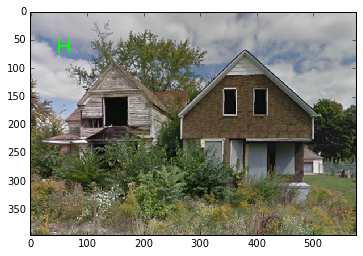

In [22]:
image_H = draw_H(image, (50, 50))
plt.imshow(image_H);

# Exercise: RGB intensity plot

plot the intensity of each channel of the image along a given row.

In [23]:
def plot_intensity(image, row):
    red_values = image[row, :, 0]
    green_values = image[row, :, 1]
    blue_values = image[row, :, 2]
    
    plt.figure()
    plt.plot(red_values)
    plt.plot(green_values)
    plt.plot(blue_values)
    
    pass

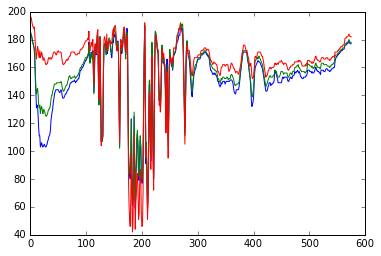

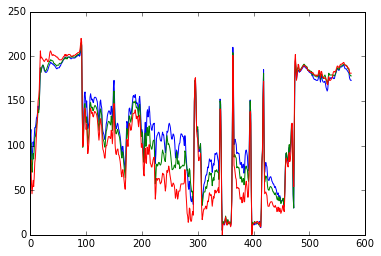

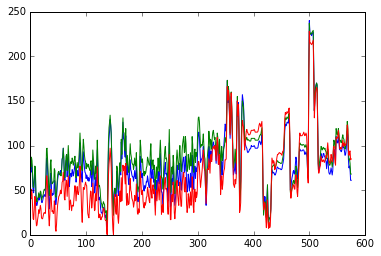

In [25]:
plot_intensity(image, 50)
plot_intensity(image, 150)
plot_intensity(image, 270)

# Exercise: Convert to black and white

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminancee is given by

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Convert an RGB image to a grayscale luminance image.

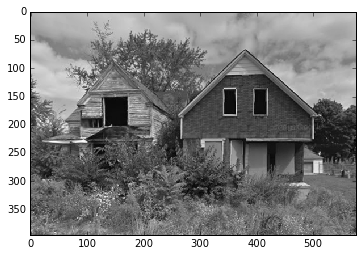

In [26]:
white = 0.2126*red_channel + 0.7152*green_channel + 0.0722*blue_channel

plt.imshow(white)

# Histograms

Histograms are a quick way to get a feel for **the global statistics of the image intensity**. For example, they can tell where to set a threshold or how to adjust the contrast of an image

(array([      0.,       0.,       0.,       0.,       0.,  227520.,
              0.,       0.,       0.,       0.]),
 array([ 254.5,  254.6,  254.7,  254.8,  254.9,  255. ,  255.1,  255.2,
         255.3,  255.4,  255.5]),
 <a list of 10 Patch objects>)

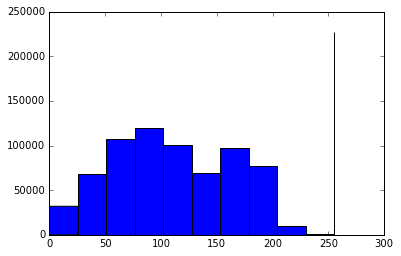

In [31]:
plt.hist(image[..., :3].ravel())
plt.hist(image[..., 3].ravel())

## Histograms and contrast

Enhancing the contrast of an image allow us to more easily identify features in an image, both by eye and by detection algorithms.

In [32]:
from skimage import exposure
high_contrast = exposure.rescale_intensity(image, in_range=(10, 200))

(395L, 576L, 4L)


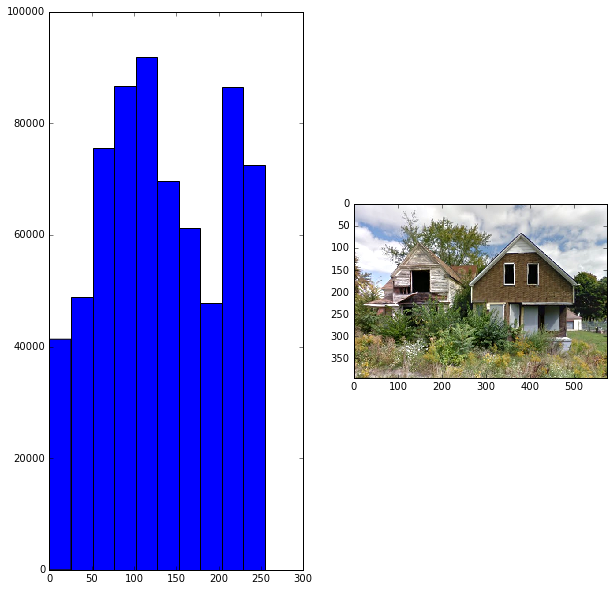

In [42]:
print(high_contrast.shape)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10, 10))
ax0.hist(high_contrast[...,:3].ravel())
ax1.imshow(high_contrast)